In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Packages to create stuff to plot ...
import sklearn
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC

Configuration of ``rcParams`` (see details [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html))

In [61]:
# Matplotlib style from file
plt.style.use('../MPL_Config/matplotlib_config.mplstyle')

# Get color list from rcParams. Can be used to enforce colors
color = mpl.rcParams['axes.prop_cycle'].by_key()['color']

Data set from sklearn:

In [62]:
X, y = make_moons(n_samples=100, noise=0.1)

Simple plot (single axis). We still suggest to use ``plt.subplots`` to generate both the figure and axis objects. These are implicitly created with any plot method but often not directly accessible. 

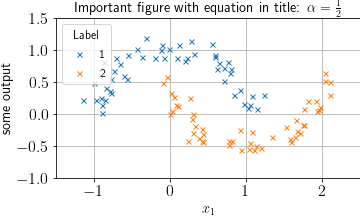

In [66]:
fig, ax = plt.subplots()

ax.plot((X[y==0])[:,0],(X[y==0])[:,1],'x',label='1')
ax.plot((X[y==1])[:,0],(X[y==1])[:,1],'x', label='2')
ax.set_xlabel('$x_1$')
ax.set_ylabel('some output')
ax.set_title(r'Important figure with equation in title: $\alpha=\frac{1}{2}$')

ax.legend(loc=2, title='Label')

ax.set_xlim(-1.5,2.5)
ax.set_ylim(-1,1.5)



# Exported figures has no useless margins
fig.tight_layout(pad=0)

# Suggestion: Use the same name for the figure as the label in the Latex code.
fig.savefig('./export/01_data.pdf',format='pdf')

Create some more things to plot (classification with support vector machines)

In [51]:
svc_rbf = SVC(kernel='rbf', C=100).fit(X,y)
svc_poly = SVC(kernel='poly', C=100, degree=5).fit(X,y)

xx = np.linspace(-1.5,2.5,50)
yy = np.linspace(-1,1.5,50)

YY, XX = np.meshgrid(yy, xx)

XY = np.concatenate([XX.reshape(-1,1), YY.reshape(-1,1)],axis=1)

Z_rbf = svc_rbf.decision_function(XY).reshape(XX.shape)
Z_poly = svc_poly.decision_function(XY).reshape(XX.shape)

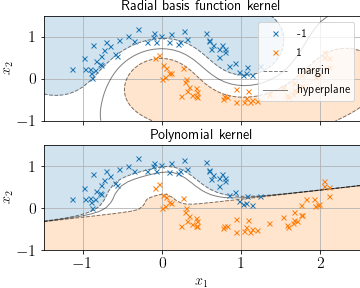

In [67]:
fig, ax = plt.subplots(2,1, figsize=(5,4), sharex=True,sharey=True)

# ---------- Subplot 1 --------------

# Color areas with their respective class:
ax[0].contourf(XX, YY, Z_rbf, levels=[-100,-1, 1,100], alpha=0.2, colors=[color[0],'white',color[1]])
# Draw separating hyperplane and margin:
ax[0].contour(XX, YY, Z_rbf, colors='k', levels=[-1,0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Add original data
ax[0].plot((X[y==0])[:,0],(X[y==0])[:,1],'x', label='-1')
ax[0].plot((X[y==1])[:,0],(X[y==1])[:,1],'x', label = ' 1')

# Trick: Add "dummy" lines to have elements for the legend 
ax[0].plot([],[],'--',color='grey',label='margin')
ax[0].plot([],[],'-',color='grey',label='hyperplane')

ax[0].set_xlim(-1.5,2.5)
ax[0].set_ylim(-1,1.5)

ax[0].set_ylabel('$x_2$')
ax[0].legend(loc=1)

ax[0].set_title('Radial basis function kernel')


# ---------- Subplot 2 --------------

# Color areas with their respective class:
ax[1].contourf(XX, YY, Z_poly, levels=[-10000,-1, 1,10000], alpha=0.2, colors=[color[0],'white',color[1]])
# Draw separating hyperplane and margin:
ax[1].contour(XX, YY, Z_poly, colors='k', levels=[-1,0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Add original data
ax[1].plot((X[y==0])[:,0],(X[y==0])[:,1],'x', label='-1')
ax[1].plot((X[y==1])[:,0],(X[y==1])[:,1],'x', label = ' 1')

# Trick: Add "dummy" lines to have elements for the legend 
ax[1].plot([],[],'--',color='grey',label='margin')
ax[1].plot([],[],'-',color='grey',label='hyperplane')

# Not necessary because axis is shared with ax[0]
#ax[1].set_xlim(-1.5,2.5)
#ax[1].set_ylim(-1,1.5)

ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')

ax[1].set_title('Polynomial kernel')

fig.tight_layout(pad=0)

# Suggestion: Use the same name for the figure as the label in the Latex code.
fig.savefig('./export/02_svm_comparison.pdf',format='pdf')